In [1]:
import geopandas as gpd
import topojson as tp
import matplotlib.pyplot as plt

# specify the custom font to use
plt.rcParams['font.family'] = 'sans-serif'
# installed font from attached 'reynold.zip'
plt.rcParams['font.sans-serif'] = 'helvetica'

In [2]:
# counties of Hungary
HunC_gpd=gpd.read_file('shapes/admin6.shp')#['geometry']
# init CRS
HunC_gpd.crs = 'epsg:3785'
# target CRS, projection
HunC_gpd.to_crs('epsg:23700',inplace=True)
# zooming in on a central area around Budapest
bp = HunC_gpd.iloc[12]["geometry"]

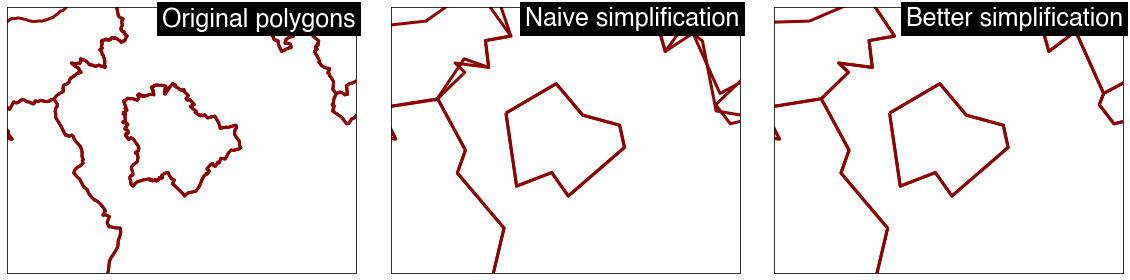

In [3]:
fig,ax = plt.subplots(1,3,figsize=(20,10))

# original boundaries
HunC_gpd.boundary.plot(figsize=(20,20),lw=3,color="darkred",ax=ax[0])
# naive simplification
HunC_gpd.simplify(3000).boundary.plot(figsize=(20,20),lw=3,color="darkred",ax=ax[1])

# converting to topoJSON, simplifying after this
HC_tp=tp.Topology(HunC_gpd).toposimplify(3000)
# converting back to geodataframe
HC_gpd_simple=HC_tp.to_gdf()
# "correct" simplification using topoJSON
HC_gpd_simple.boundary.plot(figsize=(20,20),lw=3,color="darkred", ax=ax[2])

# plot titles
labels = ["Original polygons", "Naive simplification", "Better simplification"]

# clipping, zooming in to a central region
for i,a in enumerate(ax):
    a.set_xlim(bp.bounds[0]-3e4,bp.bounds[2]+3e4)
    a.set_ylim(bp.bounds[1]-2e4,bp.bounds[3]+2e4)
    a.tick_params(
        axis='both',         
        which='both',     
        bottom=False,
        left=False,
        right=False,
        top=False,         
        labelbottom=False,
        labelleft=False
    )
    a.annotate(
        labels[i],
        (1,1),
        ha='right',
        va='top',
        xycoords='axes fraction',
        fontsize=25,
        color="white",
        bbox=dict(fc="black", ec="black", lw=2)
    )
    
plt.subplots_adjust(wspace=0.1)
plt.savefig('shapefile_polygon_simplification.png',dpi=300)